- Nama : Fahma Zuaf Zarir
- NIM : 23611054

# Bagian I: Pengumpulan dan Persiapan data 

In [2]:
# import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Read dataset
data_sma = pd.read_csv("https://raw.githubusercontent.com/FahmaZuaf/UTS-MPML/refs/heads/main/Data/Jumlah%20Sekolah%2CGuru%2CMurid%20SMA%20Menurut%20Kecamatan%20di%20DIY%202023_2024.csv")
data_pdrb = pd.read_csv("https://raw.githubusercontent.com/FahmaZuaf/UTS-MPML/refs/heads/main/Data/PDRB_per_Kapita_Atas_Dasar_Harga_Konstan_2010_Menurut_Kabupaten_Kota_diProvinsi_DIY_ribu%20rupiah%2C%202024.csv")
print(data_pdrb.info())
print(data_sma.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   Kabupaten/Kota                                          5 non-null      object
 1   Produk Domestik Regional Bruto per Kapita HK (Ribu Rp)  5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Kabupaten                           78 non-null     object
 1   Kecamatan                           78 non-null     object
 2   Jumlah Sekolah SMA (Negeri)         78 non-null     object
 3   Jumlah Sekolah SMA (Swasta)         78 non-null     object
 4   Jumlah Sekol

In [4]:
# Replace '-' with 0 and convert columns 2 to 10 to integer
columns_to_convert = data_sma.columns[2:11]
data_sma[columns_to_convert] = data_sma[columns_to_convert].replace('-', 0).astype('int64')
print(data_sma.dtypes)

Kabupaten                             object
Kecamatan                             object
Jumlah Sekolah SMA (Negeri)            int64
Jumlah Sekolah SMA (Swasta)            int64
Jumlah Sekolah SMA (Negeri+Swasta)     int64
Jumlah Guru SMA (Negeri)               int64
Jumlah Guru SMA (Swasta)               int64
Jumlah Guru SMA (Negeri+Swasta)        int64
Jumlah Murid SMA (Negeri)              int64
Jumlah Murid SMA (Swasta)              int64
Jumlah Murid SMA (Negeri+Swasta)       int64
dtype: object


In [5]:
data_sma.describe()

,Jumlah Sekolah SMA (Negeri),Jumlah Sekolah SMA (Swasta),Jumlah Sekolah SMA (Negeri+Swasta),Jumlah Guru SMA (Negeri),Jumlah Guru SMA (Swasta),Jumlah Guru SMA (Negeri+Swasta),Jumlah Murid SMA (Negeri),Jumlah Murid SMA (Swasta),Jumlah Murid SMA (Negeri+Swasta)
count,78.000000,78.000000,78.00000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,0.884615,1.358974,2.24359,32.923077,19.948718,52.871795,564.833333,239.512821,804.346154
std,0.664123,1.728105,2.04613,29.441013,33.333770,54.182318,520.950366,496.805268,862.970479
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.000000,1.00000,4.250000,0.000000,20.500000,30.000000,0.000000,293.750000
50%,1.000000,1.000000,1.00000,30.000000,5.500000,36.000000,528.000000,37.500000,554.000000
75%,1.000000,2.000000,3.75000,44.750000,22.000000,74.000000,755.000000,218.500000,1038.500000
max,3.000000,8.000000,9.00000,140.000000,179.000000,319.000000,2467.000000,2522.000000,4888.000000


In [6]:
jumlah_sma_per_kabupaten = data_sma.groupby('Kabupaten')['Jumlah Sekolah SMA (Negeri+Swasta)'].sum()
print(jumlah_sma_per_kabupaten)
print("Jumlah Sekolah SMA di Provinsi DIY Tahun 2024:",sum(jumlah_sma_per_kabupaten))

Kabupaten
Bantul             37
Gunung Kidul       24
Kota Yogyakarta    42
Kulon Progo        17
Sleman             55
Name: Jumlah Sekolah SMA (Negeri+Swasta), dtype: int64
Jumlah Sekolah SMA di Provinsi DIY Tahun 2024: 175


In [7]:
jumlah_gurusma = data_sma.groupby('Kabupaten')['Jumlah Guru SMA (Negeri+Swasta)'].sum()
print(jumlah_gurusma)
print("Jumlah Guru SMA di Provinsi DIY Tahun 2024:",sum(jumlah_gurusma))

Kabupaten
Bantul              973
Gunung Kidul        493
Kota Yogyakarta    1177
Kulon Progo         399
Sleman             1082
Name: Jumlah Guru SMA (Negeri+Swasta), dtype: int64
Jumlah Guru SMA di Provinsi DIY Tahun 2024: 4124


In [8]:
jumlah_muridsma = data_sma.groupby('Kabupaten')['Jumlah Murid SMA (Negeri+Swasta)'].sum()
print(jumlah_muridsma)
print("Jumlah Murid SMA di Provinsi DIY Tahun 2024:",sum(jumlah_muridsma))

Kabupaten
Bantul             15512
Gunung Kidul        7784
Kota Yogyakarta    17690
Kulon Progo         5436
Sleman             16317
Name: Jumlah Murid SMA (Negeri+Swasta), dtype: int64
Jumlah Murid SMA di Provinsi DIY Tahun 2024: 62739


In [9]:
data_pdrb.describe()
# Check for missing values  
print(data_pdrb.isnull().sum())
# Check for duplicates  
print(data_pdrb.duplicated().sum())

Kabupaten/Kota                                            0
Produk Domestik Regional Bruto per Kapita HK (Ribu Rp)    0
dtype: int64
0


# Bagian II: Clustering 

## Hierarchical Clustering

Checking Distribution

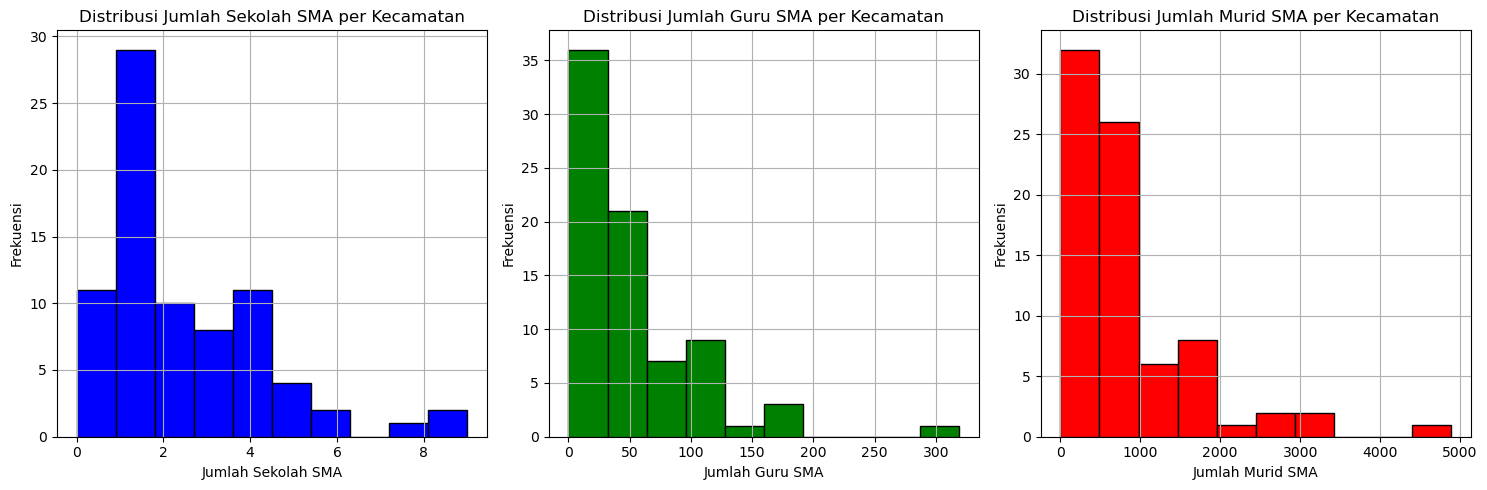

In [10]:
# Visualisasi distribusi jumlah murid, guru, dan sekolah SMA per kecamatan
plt.figure(figsize=(15, 5))

# Distribusi jumlah sekolah SMA
plt.subplot(1, 3, 1)
plt.hist(data_sma['Jumlah Sekolah SMA (Negeri+Swasta)'], bins=10, color='blue', edgecolor='k')
plt.title("Distribusi Jumlah Sekolah SMA per Kecamatan", fontsize=12)
plt.xlabel("Jumlah Sekolah SMA", fontsize=10)
plt.ylabel("Frekuensi", fontsize=10)
plt.grid(True)

# Distribusi jumlah guru SMA
plt.subplot(1, 3, 2)
plt.hist(data_sma['Jumlah Guru SMA (Negeri+Swasta)'], bins=10, color='green', edgecolor='k')
plt.title("Distribusi Jumlah Guru SMA per Kecamatan", fontsize=12)
plt.xlabel("Jumlah Guru SMA", fontsize=10)
plt.ylabel("Frekuensi", fontsize=10)
plt.grid(True)

# Distribusi jumlah murid SMA
plt.subplot(1, 3, 3)
plt.hist(data_sma['Jumlah Murid SMA (Negeri+Swasta)'], bins=10, color='red', edgecolor='k')
plt.title("Distribusi Jumlah Murid SMA per Kecamatan", fontsize=12)
plt.xlabel("Jumlah Murid SMA", fontsize=10)
plt.ylabel("Frekuensi", fontsize=10)
plt.grid(True)

plt.tight_layout()
plt.show()

Distribusi Data SMA per Kecamatan

Distribusi data SMA per kecamatan mencakup jumlah sekolah, guru, dan murid SMA di setiap kecamatan di Provinsi DIY. Berikut adalah penjelasan distribusi berdasarkan data yang tersedia:

1. **Jumlah Sekolah SMA**:
    - Terdapat variasi jumlah sekolah SMA (Negeri+Swasta) di setiap kecamatan.
    - Beberapa kecamatan memiliki jumlah sekolah yang sangat rendah (hanya 1 sekolah), sedangkan kecamatan lain memiliki jumlah sekolah yang lebih tinggi (hingga 9 sekolah).
    - Kecamatan dengan jumlah sekolah yang lebih tinggi cenderung berada di wilayah perkotaan seperti Kota Yogyakarta.

2. **Jumlah Guru SMA**:
    - Distribusi jumlah guru SMA menunjukkan bahwa kecamatan dengan jumlah sekolah lebih banyak juga memiliki jumlah guru yang lebih tinggi.
    - Jumlah guru SMA berkisar dari belasan hingga ratusan, tergantung pada jumlah sekolah dan kapasitas masing-masing sekolah.

3. **Jumlah Murid SMA**:
    - Jumlah murid SMA per kecamatan menunjukkan variasi yang signifikan, dengan beberapa kecamatan memiliki jumlah murid yang sangat rendah (kurang dari 100 murid) hingga ribuan murid.
    - Kecamatan dengan jumlah murid yang tinggi biasanya memiliki lebih banyak sekolah dan guru, menunjukkan hubungan positif antara jumlah sekolah, guru, dan murid.

4. **Kecamatan dengan Cluster Tertentu**:
    - Berdasarkan hasil clustering, kecamatan dikelompokkan ke dalam beberapa cluster berdasarkan karakteristik jumlah sekolah, guru, dan murid.
    - Cluster tertentu menunjukkan kecamatan dengan jumlah sekolah, guru, dan murid yang lebih tinggi, seperti di wilayah perkotaan, sedangkan cluster lainnya menunjukkan kecamatan dengan jumlah yang lebih rendah, biasanya di wilayah pedesaan.

5. **Pola Distribusi**:
    - Distribusi data menunjukkan adanya ketimpangan antara kecamatan di wilayah perkotaan dan pedesaan.
    - Kecamatan di wilayah perkotaan seperti Kota Yogyakarta cenderung memiliki fasilitas pendidikan yang lebih baik dibandingkan kecamatan di wilayah pedesaan seperti Gunung Kidul.

#### Kesimpulan:
Distribusi data SMA per kecamatan menunjukkan adanya variasi yang signifikan dalam jumlah sekolah, guru, dan murid. Wilayah perkotaan cenderung memiliki fasilitas pendidikan yang lebih baik dibandingkan wilayah pedesaan, yang dapat menjadi perhatian dalam upaya pemerataan akses pendidikan di Provinsi DIY.


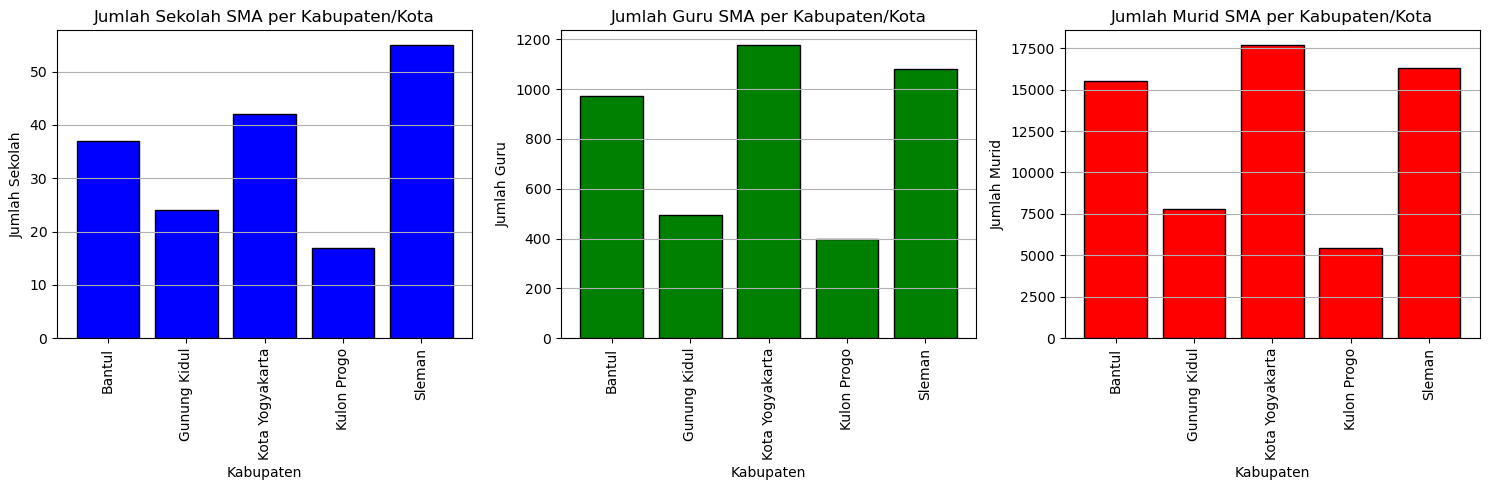

In [11]:
# Visualisasi jumlah sekolah, guru, dan murid SMA per kabupaten
plt.figure(figsize=(15, 5))

# Bar plot jumlah sekolah SMA
plt.subplot(1, 3, 1)
jumlah_sma_per_kabupaten.plot(kind='bar', color='blue', edgecolor='k', width=0.8)
plt.title("Jumlah Sekolah SMA per Kabupaten/Kota", fontsize=12)
plt.xlabel("Kabupaten", fontsize=10)
plt.ylabel("Jumlah Sekolah", fontsize=10)
plt.grid(axis='y')

# Bar plot jumlah guru SMA
plt.subplot(1, 3, 2)
jumlah_gurusma.plot(kind='bar', color='green', edgecolor='k', width=0.8)
plt.title("Jumlah Guru SMA per Kabupaten/Kota", fontsize=12)
plt.xlabel("Kabupaten", fontsize=10)
plt.ylabel("Jumlah Guru", fontsize=10)
plt.grid(axis='y')

# Bar plot jumlah murid SMA
plt.subplot(1, 3, 3)
jumlah_muridsma.plot(kind='bar', color='red', edgecolor='k', width=0.8)
plt.title("Jumlah Murid SMA per Kabupaten/Kota", fontsize=12)
plt.xlabel("Kabupaten", fontsize=10)
plt.ylabel("Jumlah Murid", fontsize=10)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

Distribusi data SMA per kabupaten mencakup jumlah sekolah, guru, dan murid SMA di setiap kabupaten di Provinsi DIY. Berikut adalah penjelasan distribusi berdasarkan data yang tersedia:

1. **Jumlah Sekolah SMA**:
    - Kabupaten dengan jumlah sekolah SMA tertinggi adalah **Sleman** dengan **55 sekolah**, diikuti oleh **Kota Yogyakarta** dengan **42 sekolah**.
    - Kabupaten dengan jumlah sekolah SMA terendah adalah **Kulon Progo** dengan **17 sekolah**.

2. **Jumlah Guru SMA**:
    - Kabupaten dengan jumlah guru SMA tertinggi adalah **Kota Yogyakarta** dengan **1,177 guru**, diikuti oleh **Sleman** dengan **1,082 guru**.
    - Kabupaten dengan jumlah guru SMA terendah adalah **Kulon Progo** dengan **399 guru**.

3. **Jumlah Murid SMA**:
    - Kabupaten dengan jumlah murid SMA tertinggi adalah **Kota Yogyakarta** dengan **17,690 murid**, diikuti oleh **Sleman** dengan **16,317 murid**.
    - Kabupaten dengan jumlah murid SMA terendah adalah **Kulon Progo** dengan **5,436 murid**.

4. **Pola Distribusi**:
    - Kabupaten di wilayah perkotaan seperti **Kota Yogyakarta** dan **Sleman** cenderung memiliki jumlah sekolah, guru, dan murid yang lebih tinggi dibandingkan kabupaten di wilayah pedesaan seperti **Gunung Kidul** dan **Kulon Progo**.
    - Hal ini menunjukkan adanya ketimpangan dalam distribusi fasilitas pendidikan di Provinsi DIY.

#### Kesimpulan:
Distribusi data SMA per kabupaten menunjukkan bahwa wilayah perkotaan memiliki fasilitas pendidikan yang lebih baik dibandingkan wilayah pedesaan. Pemerataan akses pendidikan dapat menjadi perhatian untuk meningkatkan kualitas pendidikan di seluruh kabupaten di Provinsi DIY.


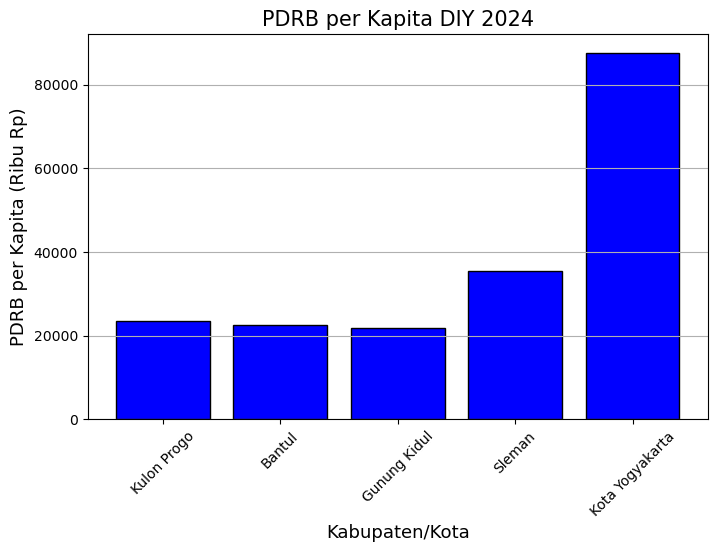

In [12]:
plt.figure(figsize=(8, 5))
plt.bar(data_pdrb['Kabupaten/Kota'], data_pdrb['Produk Domestik Regional Bruto per Kapita HK (Ribu Rp)'], color='blue', edgecolor='k')
plt.title("PDRB per Kapita DIY 2024", fontsize=15)
plt.xlabel("Kabupaten/Kota", fontsize=13)
plt.ylabel("PDRB per Kapita (Ribu Rp)", fontsize=13)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Distribusi PDRB per kapita di Provinsi DIY menunjukkan adanya variasi yang signifikan antar kabupaten/kota. Berikut adalah interpretasi berdasarkan data:

1. **Kota Yogyakarta**:
    - Memiliki PDRB per kapita tertinggi sebesar **Rp 87.723.000**.
    - Hal ini mencerminkan tingkat ekonomi yang jauh lebih maju dibandingkan kabupaten lainnya. Kota Yogyakarta sebagai pusat pemerintahan, pendidikan, dan pariwisata memiliki kontribusi besar terhadap ekonomi daerah.

2. **Sleman**:
    - PDRB per kapita sebesar **Rp 35.567.000**, menempati posisi kedua tertinggi.
    - Kabupaten ini memiliki infrastruktur pendidikan yang baik dan merupakan lokasi dari banyak institusi pendidikan tinggi, termasuk Universitas Gadjah Mada, yang berkontribusi pada perekonomian.

3. **Kulon Progo**:
    - PDRB per kapita sebesar **Rp 23.413.000**.
    - Kabupaten ini menunjukkan potensi ekonomi yang sedang berkembang, terutama dengan adanya Bandara Internasional Yogyakarta (YIA) yang dapat mendorong pertumbuhan ekonomi di masa depan.

4. **Bantul**:
    - PDRB per kapita sebesar **Rp 22.564.000**.
    - Kabupaten ini memiliki keseimbangan antara sektor pertanian, pariwisata, dan pendidikan, meskipun PDRB-nya masih berada di bawah Sleman dan Kota Yogyakarta.

5. **Gunung Kidul**:
    - Memiliki PDRB per kapita terendah sebesar **Rp 21.945.000**.
    - Kabupaten ini menghadapi tantangan dalam pengembangan ekonomi, meskipun memiliki potensi besar di sektor pariwisata alam.

#### Kesimpulan:
- Kota Yogyakarta memiliki PDRB per kapita yang jauh lebih tinggi dibandingkan kabupaten lainnya, menunjukkan adanya ketimpangan ekonomi di Provinsi DIY.
- Kabupaten Sleman juga memiliki PDRB yang cukup tinggi, didukung oleh sektor pendidikan dan pariwisata.
- Kabupaten lainnya, seperti Bantul, Kulon Progo, dan Gunung Kidul, memiliki PDRB per kapita yang relatif lebih rendah, menunjukkan perlunya perhatian lebih dalam pengembangan ekonomi di wilayah tersebut.


Korelasi antara PDRB per Kapita dan variabel SMA:
Jumlah Sekolah SMA    0.418343
Jumlah Guru SMA       0.652465
Jumlah Murid SMA      0.609245
Name: PDRB per Kapita, dtype: float64


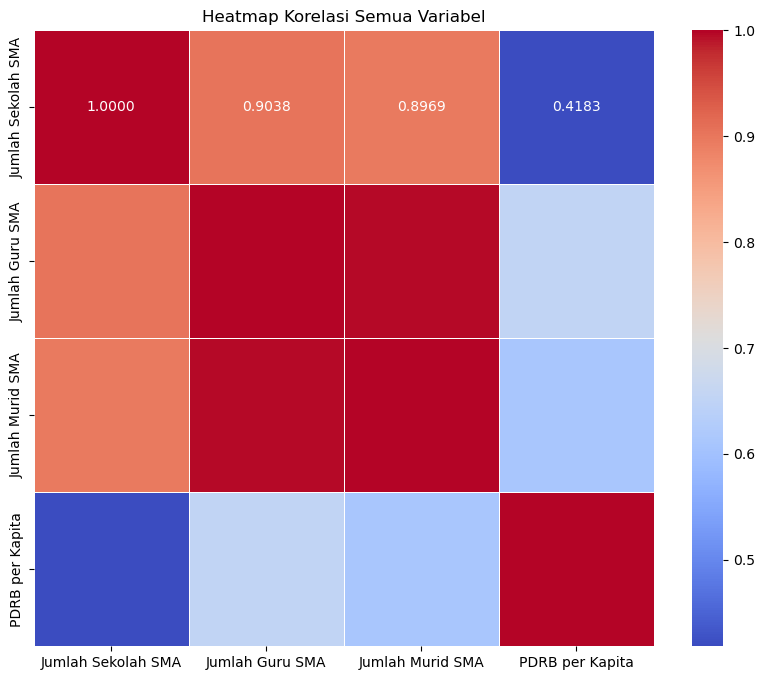

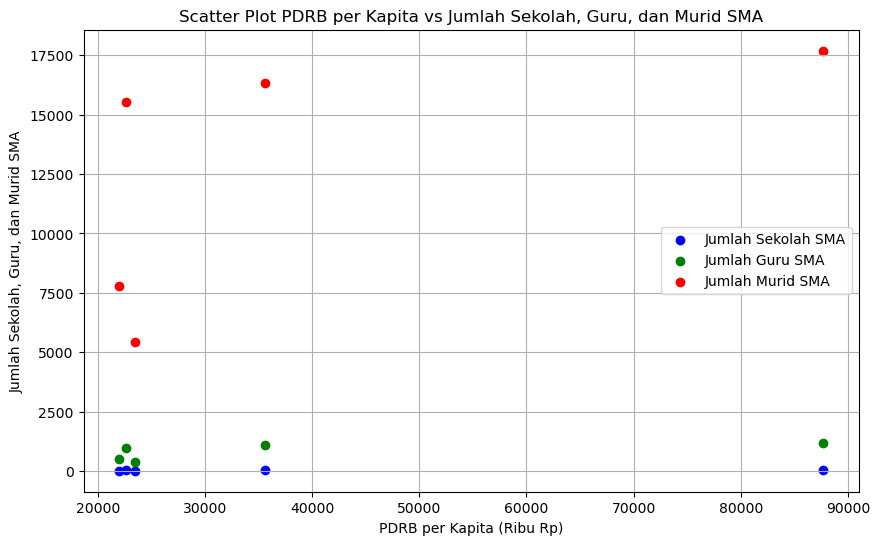

In [13]:
# Gabungkan data yang relevan untuk clustering jika belum ada
if 'combined_data' not in locals():
    combined_data = pd.DataFrame({
        'Jumlah Sekolah SMA': jumlah_sma_per_kabupaten,
        'Jumlah Guru SMA': jumlah_gurusma,
        'Jumlah Murid SMA': jumlah_muridsma,
        'PDRB per Kapita': data_pdrb.set_index('Kabupaten/Kota')['Produk Domestik Regional Bruto per Kapita HK (Ribu Rp)']
    })

# Hitung korelasi
correlation = combined_data.corr()

# Tampilkan korelasi antara PDRB per Kapita dan variabel SMA
print("Korelasi antara PDRB per Kapita dan variabel SMA:")
print(correlation.loc[['Jumlah Sekolah SMA', 'Jumlah Guru SMA', 'Jumlah Murid SMA'], 'PDRB per Kapita'])

# Visualisasi korelasi dengan angka untuk semua variabel
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".4f", linewidths=.5, annot_kws={"size": 10}, square=False)
plt.title("Heatmap Korelasi Semua Variabel")
plt.show()

# Visualisasi scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(combined_data['PDRB per Kapita'], combined_data['Jumlah Sekolah SMA'], color='blue', label='Jumlah Sekolah SMA')
plt.scatter(combined_data['PDRB per Kapita'], combined_data['Jumlah Guru SMA'], color='green', label='Jumlah Guru SMA')
plt.scatter(combined_data['PDRB per Kapita'], combined_data['Jumlah Murid SMA'], color='red', label='Jumlah Murid SMA')
plt.title("Scatter Plot PDRB per Kapita vs Jumlah Sekolah, Guru, dan Murid SMA")
plt.xlabel("PDRB per Kapita (Ribu Rp)")
plt.ylabel("Jumlah Sekolah, Guru, dan Murid SMA")
plt.legend()
plt.grid(True)
plt.show()


Berdasarkan matriks korelasi yang tersedia, berikut adalah korelasi antara **PDRB per Kapita** dan variabel-variabel terkait data SMA:

| Variabel                              | Korelasi dengan PDRB per Kapita |
|---------------------------------------|----------------------------------|
| Jumlah Sekolah SMA (Negeri+Swasta)    | 0.418343                        |
| Jumlah Guru SMA (Negeri+Swasta)       | 0.652465                        |
| Jumlah Murid SMA (Negeri+Swasta)      | 0.609245                        |

#### Penjelasan:
- **Korelasi Terbesar**: Variabel **Jumlah Guru SMA (Negeri+Swasta)** memiliki korelasi terbesar dengan **PDRB per Kapita**, yaitu sebesar **0.652465**.
- **Interpretasi**: Korelasi positif ini menunjukkan bahwa kabupaten/kota dengan jumlah guru SMA yang lebih banyak cenderung memiliki PDRB per kapita yang lebih tinggi. Hal ini dapat mencerminkan bahwa daerah dengan infrastruktur pendidikan yang lebih baik (diukur dari jumlah guru) memiliki tingkat ekonomi yang lebih maju.
- **Hubungan Lainnya**: Jumlah murid SMA juga memiliki korelasi yang cukup tinggi dengan PDRB (0.609245), sedangkan jumlah sekolah SMA memiliki korelasi yang lebih rendah (0.418343).

#### Kesimpulan:
Jumlah guru SMA (Negeri+Swasta) adalah variabel yang paling berkorelasi dengan PDRB per kapita, menunjukkan pentingnya peran tenaga pendidik dalam mendukung perkembangan ekonomi daerah.

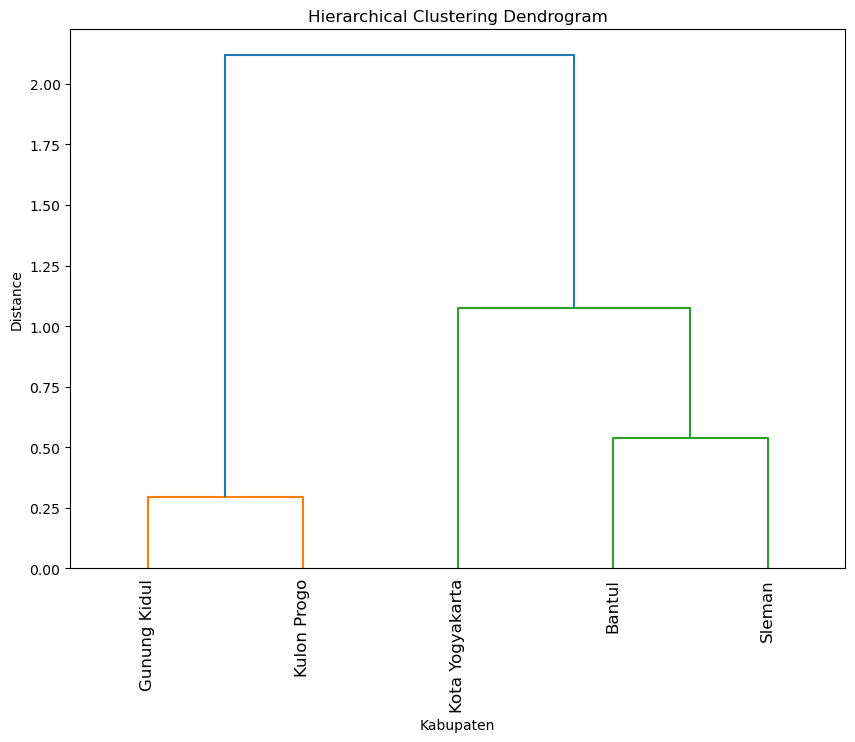

In [14]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import MinMaxScaler

# Pastikan scaler sudah diinisialisasi sebelumnya
scaler = MinMaxScaler()

# Gabungkan data yang relevan untuk clustering
combined_data = pd.DataFrame({
    'Jumlah Sekolah SMA': jumlah_sma_per_kabupaten,
    'Jumlah Guru SMA': jumlah_gurusma,
    'Jumlah Murid SMA': jumlah_muridsma,
    'PDRB per Kapita': data_pdrb.set_index('Kabupaten/Kota')['Produk Domestik Regional Bruto per Kapita HK (Ribu Rp)']
})

# Standardize the data using MinMaxScaler
scaled_data = scaler.fit_transform(combined_data)

# Perform hierarchical clustering
linkage_matrix = linkage(scaled_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=combined_data.index, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Kabupaten')
plt.ylabel('Distance')
plt.show()


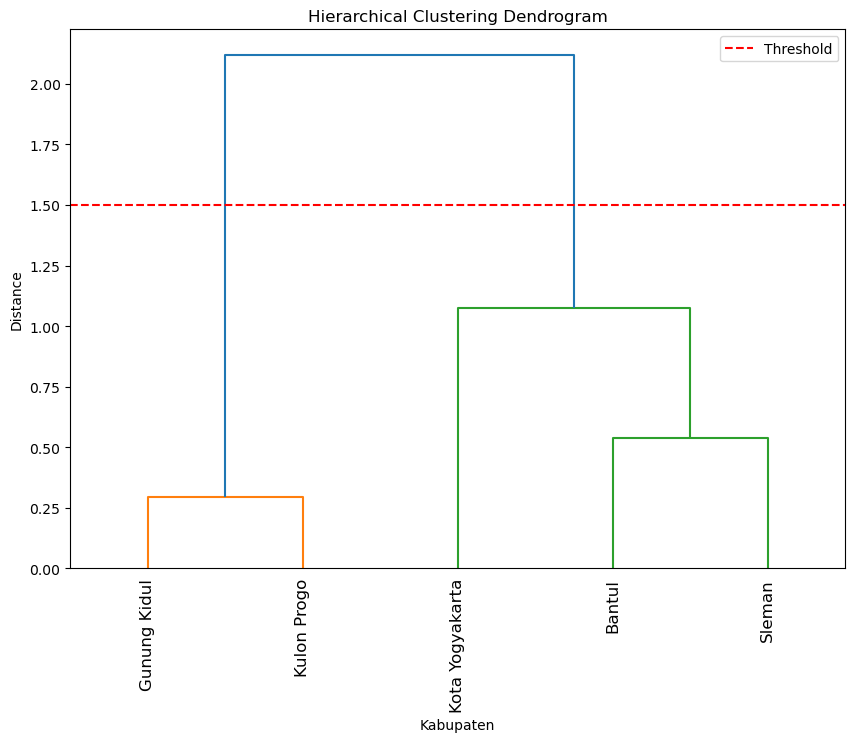

In [15]:
# Tambahkan garis horizontal pada dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=combined_data.index, leaf_rotation=90)
plt.axhline(y=1.5, color='r', linestyle='--', label='Threshold')  # Tambahkan garis horizontal
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Kabupaten')
plt.ylabel('Distance')
plt.legend()
plt.show()

### Penjelasan Dendrogram

Dendrogram adalah representasi visual dari proses hierarchical clustering. Pada dendrogram yang dihasilkan, setiap titik data (dalam hal ini kabupaten/kota) awalnya dianggap sebagai cluster individu. Kemudian, cluster yang paling mirip (berdasarkan jarak atau kemiripan) digabungkan secara iteratif hingga semua data berada dalam satu cluster.

#### Komponen Dendrogram:
1. **Sumbu X**: Menampilkan label data (nama kabupaten/kota) yang dikelompokkan.
2. **Sumbu Y**: Menunjukkan jarak atau tingkat kemiripan antara cluster yang digabungkan. Semakin rendah nilai pada sumbu Y, semakin mirip cluster yang digabungkan.
3. **Garis Horizontal**: Menunjukkan penggabungan cluster. Semakin tinggi garis horizontal, semakin besar jarak atau perbedaan antara cluster yang digabungkan.
4. **Garis Vertikal**: Menghubungkan data atau cluster yang digabungkan.

#### Interpretasi Dendrogram:
- Pada dendrogram ini, kabupaten/kota yang lebih mirip (berdasarkan variabel seperti jumlah sekolah, guru, murid SMA, dan PDRB per kapita) akan digabungkan lebih awal (garis horizontal lebih rendah).
- Misalnya, jika dua kabupaten memiliki garis horizontal yang sangat rendah, itu berarti mereka memiliki karakteristik yang sangat mirip.
- Tinggi garis horizontal yang menghubungkan cluster menunjukkan tingkat perbedaan antara cluster. Semakin tinggi garisnya, semakin besar perbedaan antara cluster yang digabungkan.

#### Contoh:
- Berdasarkan data, **Kota Yogyakarta** memiliki PDRB per kapita yang jauh lebih tinggi dibandingkan kabupaten lainnya (Rp 87.723), yang mencerminkan tingkat ekonomi yang lebih maju. Kota ini juga memiliki jumlah sekolah, guru, dan murid SMA yang relatif tinggi, menunjukkan konsentrasi pendidikan yang signifikan.
- **Sleman** memiliki jumlah sekolah SMA tertinggi (55 sekolah) dengan PDRB per kapita sebesar Rp 35.567. Hal ini menunjukkan bahwa Sleman memiliki infrastruktur pendidikan yang baik meskipun PDRB-nya tidak setinggi Kota Yogyakarta.
- **Bantul** memiliki jumlah sekolah, guru, dan murid SMA yang cukup besar dengan PDRB per kapita sebesar Rp 22.564, menunjukkan keseimbangan antara pendidikan dan ekonomi.
- **Gunung Kidul** memiliki jumlah sekolah, guru, dan murid SMA yang lebih rendah dibandingkan kabupaten lainnya, dengan PDRB per kapita sebesar Rp 21.945. Hal ini menunjukkan bahwa daerah ini mungkin memiliki tantangan dalam hal akses pendidikan dan ekonomi.
- **Kulon Progo** memiliki jumlah sekolah SMA terendah (17 sekolah) dengan PDRB per kapita sebesar Rp 23.413, menunjukkan bahwa daerah ini mungkin memerlukan perhatian lebih dalam pengembangan pendidikan dan ekonomi.

Dendrogram ini membantu kita memahami struktur hierarki dan hubungan antar cluster sebelum menentukan jumlah cluster yang optimal untuk analisis lebih lanjut.


## K-Means Clustering

In [16]:
from sklearn.cluster import KMeans

# Standarisasi data menggunakan MinMaxScaler
scaled_combined_data = scaler.fit_transform(combined_data)

# Lakukan clustering menggunakan K-Means
kmeans_combined = KMeans(n_clusters=3, random_state=42)
combined_data['Cluster'] = kmeans_combined.fit_predict(scaled_combined_data)

# Tampilkan hasil clustering
print(combined_data[['Jumlah Sekolah SMA', 'Jumlah Guru SMA', 'Jumlah Murid SMA', 'PDRB per Kapita', 'Cluster']])


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


                 Jumlah Sekolah SMA  Jumlah Guru SMA  Jumlah Murid SMA  \
Bantul                           37              973             15512   
Gunung Kidul                     24              493              7784   
Kota Yogyakarta                  42             1177             17690   
Kulon Progo                      17              399              5436   
Sleman                           55             1082             16317   

                 PDRB per Kapita  Cluster  
Bantul                     22564        0  
Gunung Kidul               21945        1  
Kota Yogyakarta            87723        2  
Kulon Progo                23413        1  
Sleman                     35567        0  


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

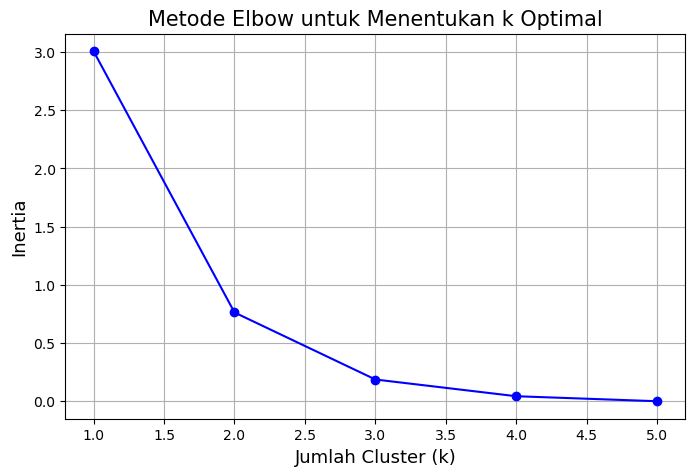

In [17]:
# Adjust the range of k to ensure it does not exceed the number of samples
k_values = range(1, len(scaled_combined_data) + 1)  # Maximum k is the number of samples
inertia_values = []

# Calculate inertia for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_combined_data)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.title('Metode Elbow untuk Menentukan k Optimal', fontsize=15)
plt.xlabel('Jumlah Cluster (k)', fontsize=13)
plt.ylabel('Inertia', fontsize=13)
plt.grid(True)
plt.show()


Metode Elbow adalah teknik yang digunakan untuk menentukan jumlah cluster optimal dalam algoritma clustering seperti K-Means. Metode ini memanfaatkan nilai **inertia**, yaitu jumlah kuadrat jarak antara setiap titik data dan centroid cluster terdekatnya. Semakin kecil nilai inertia, semakin baik data dikelompokkan.

Langkah-Langkah:
1. Jalankan algoritma K-Means untuk berbagai jumlah cluster (k), misalnya dari 1 hingga n.
2. Hitung nilai inertia untuk setiap k.
3. Plot nilai inertia terhadap jumlah cluster (k).
4. Cari titik di mana penurunan inertia mulai melambat secara signifikan, membentuk "siku" atau "elbow" pada grafik.

Interpretasi:
- **Sebelum Titik Elbow**: Penurunan inertia signifikan karena penambahan cluster membantu mengelompokkan data lebih baik.
- **Setelah Titik Elbow**: Penurunan inertia menjadi kecil, menunjukkan bahwa penambahan cluster tidak memberikan peningkatan signifikan dalam pengelompokan.

Kesimpulan:
Titik elbow pada grafik menunjukkan jumlah cluster optimal. Pada titik ini, model memiliki keseimbangan antara kompleksitas (jumlah cluster) dan kualitas pengelompokan.

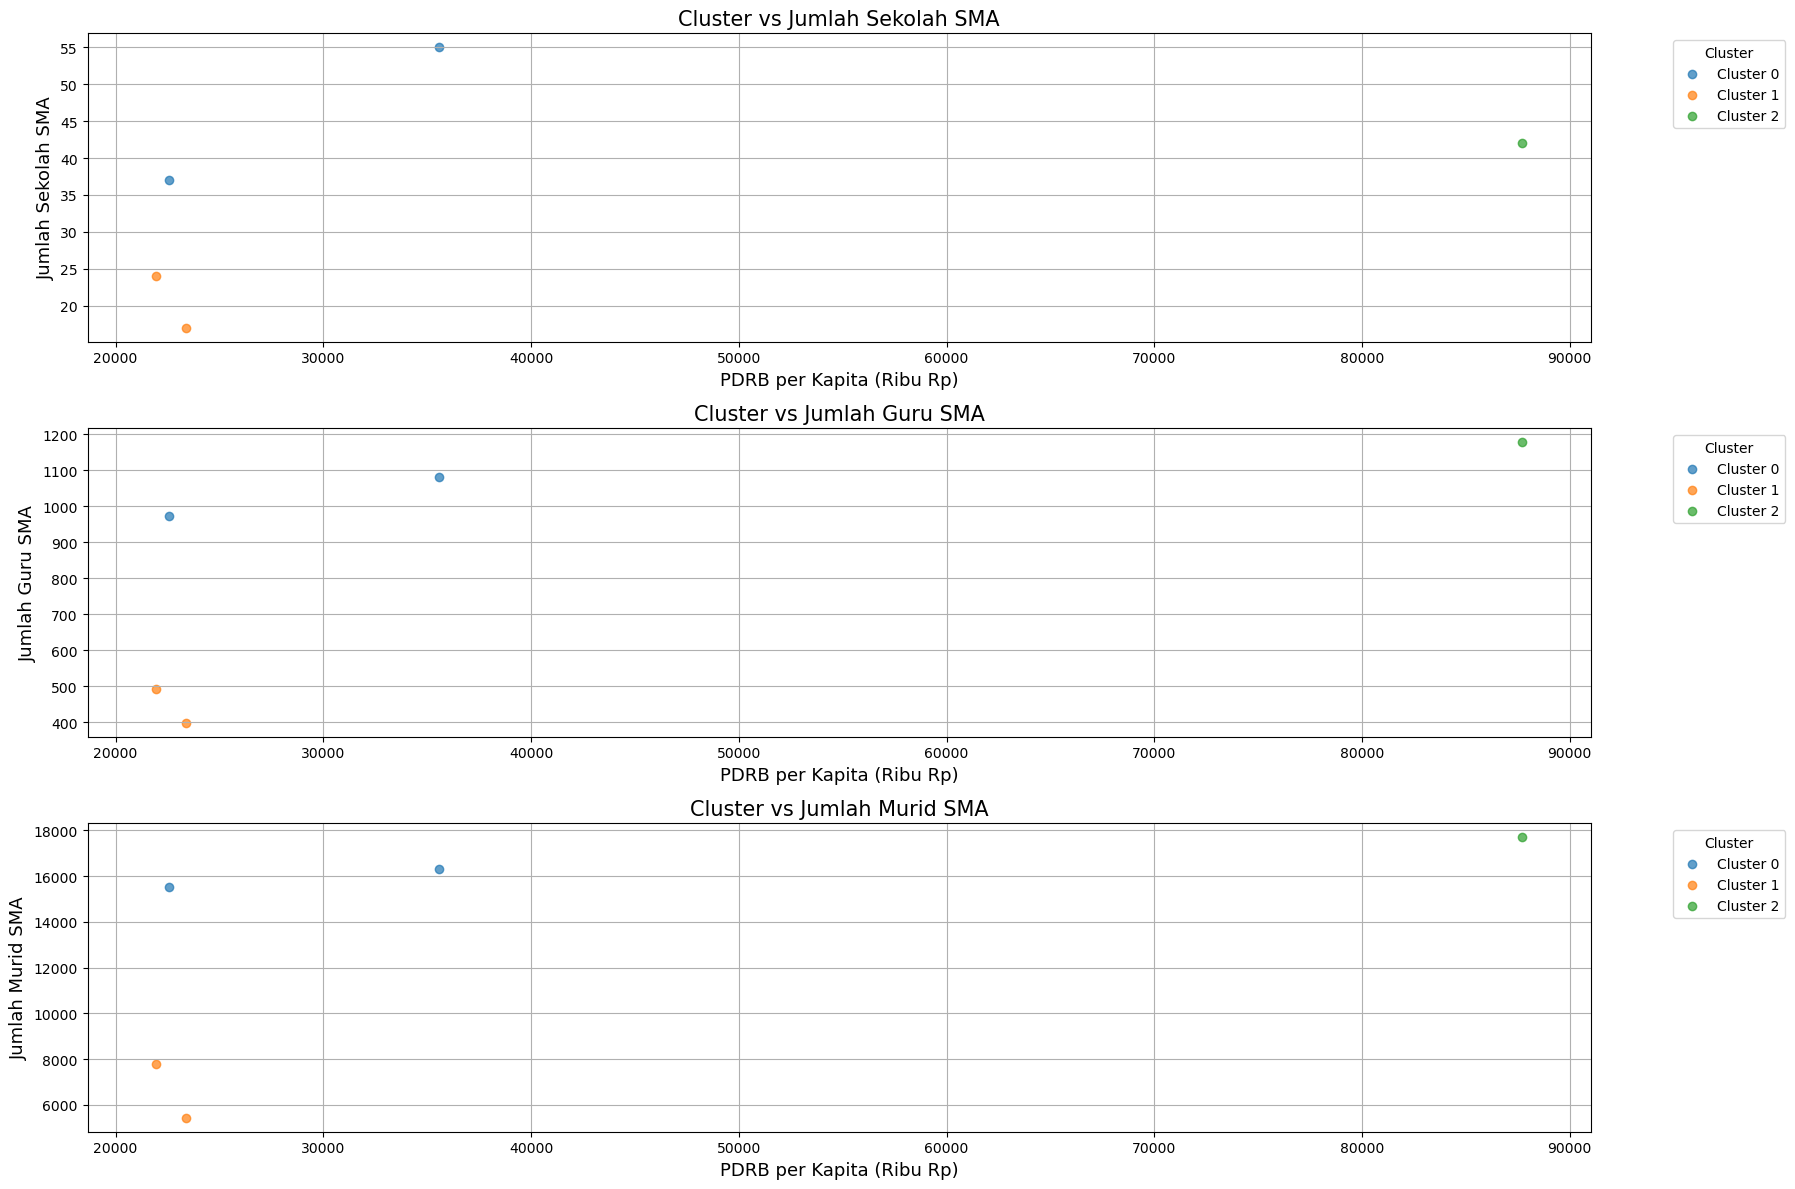

In [18]:
# Visualisasi hasil clustering dengan variabel terpisah
plt.figure(figsize=(18, 12))

# Scatter plot untuk Jumlah Sekolah SMA
plt.subplot(3, 1, 1)
for cluster in combined_data['Cluster'].unique():
    cluster_data = combined_data[combined_data['Cluster'] == cluster]
    plt.scatter(cluster_data['PDRB per Kapita'], 
                cluster_data['Jumlah Sekolah SMA'], 
                label=f'Cluster {cluster}', alpha=0.7)
plt.title('Cluster vs Jumlah Sekolah SMA', fontsize=15)
plt.xlabel('PDRB per Kapita (Ribu Rp)', fontsize=13)
plt.ylabel('Jumlah Sekolah SMA', fontsize=13)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Scatter plot untuk Jumlah Guru SMA
plt.subplot(3, 1, 2)
for cluster in combined_data['Cluster'].unique():
    cluster_data = combined_data[combined_data['Cluster'] == cluster]
    plt.scatter(cluster_data['PDRB per Kapita'], 
                cluster_data['Jumlah Guru SMA'], 
                label=f'Cluster {cluster}', alpha=0.7)
plt.title('Cluster vs Jumlah Guru SMA', fontsize=15)
plt.xlabel('PDRB per Kapita (Ribu Rp)', fontsize=13)
plt.ylabel('Jumlah Guru SMA', fontsize=13)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Scatter plot untuk Jumlah Murid SMA
plt.subplot(3, 1, 3)
for cluster in combined_data['Cluster'].unique():
    cluster_data = combined_data[combined_data['Cluster'] == cluster]
    plt.scatter(cluster_data['PDRB per Kapita'], 
                cluster_data['Jumlah Murid SMA'], 
                label=f'Cluster {cluster}', alpha=0.7)
plt.title('Cluster vs Jumlah Murid SMA', fontsize=15)
plt.xlabel('PDRB per Kapita (Ribu Rp)', fontsize=13)
plt.ylabel('Jumlah Murid SMA', fontsize=13)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()

K-Means adalah algoritma clustering yang membagi data ke dalam sejumlah cluster berdasarkan kemiripan antar data. Berikut adalah langkah-langkah dan hasil clustering menggunakan K-Means pada data ini:

#### Langkah-Langkah:
1. **Standarisasi Data**:
    - Data yang digunakan untuk clustering, seperti jumlah sekolah, guru, murid SMA, dan PDRB per kapita, distandarisasi menggunakan `MinMaxScaler`. Hal ini dilakukan agar semua variabel memiliki skala yang sama dan tidak ada variabel yang mendominasi hasil clustering.

2. **Menentukan Jumlah Cluster (k)**:
    - Jumlah cluster optimal ditentukan menggunakan **Metode Elbow**. Grafik inertia menunjukkan titik elbow, yaitu jumlah cluster di mana penurunan inertia mulai melambat. Dalam kasus ini, jumlah cluster optimal adalah **3**.

3. **Proses Clustering**:
    - Algoritma K-Means dijalankan dengan `k=3`. Data dikelompokkan ke dalam 3 cluster berdasarkan kemiripan nilai variabel.

4. **Hasil Clustering**:
    - Setiap kabupaten/kota dikelompokkan ke dalam salah satu dari 3 cluster. Berikut adalah hasil clustering:

| Kabupaten/Kota     | Cluster |
|---------------------|---------|
| Bantul             | 0       |
| Gunung Kidul       | 1       |
| Kota Yogyakarta    | 2       |
| Kulon Progo        | 1       |
| Sleman             | 0       |

#### Interpretasi Cluster:
1. **Cluster 0**:
    - Kabupaten/kota dalam cluster ini memiliki jumlah sekolah, guru, dan murid SMA yang relatif tinggi, tetapi PDRB per kapita tidak setinggi Kota Yogyakarta.
    - Contoh: Sleman dan Bantul.

2. **Cluster 1**:
    - Kabupaten/kota dalam cluster ini memiliki jumlah sekolah, guru, dan murid SMA yang lebih rendah, serta PDRB per kapita yang juga relatif rendah.
    - Contoh: Gunung Kidul dan Kulon Progo.

3. **Cluster 2**:
    - Cluster ini hanya terdiri dari Kota Yogyakarta, yang memiliki PDRB per kapita tertinggi, jumlah guru dan murid SMA yang besar, serta fasilitas pendidikan yang lebih baik dibandingkan kabupaten lainnya.

#### Kesimpulan:
- Clustering menggunakan K-Means berhasil mengelompokkan kabupaten/kota di Provinsi DIY berdasarkan karakteristik pendidikan dan ekonomi.
- Cluster 2 (Kota Yogyakarta) menunjukkan wilayah dengan tingkat ekonomi dan pendidikan yang paling maju.
- Cluster 1 (Gunung Kidul dan Kulon Progo) menunjukkan wilayah dengan tantangan dalam pendidikan dan ekonomi.
- Cluster 0 (Sleman dan Bantul) berada di tengah-tengah, dengan fasilitas pendidikan yang baik tetapi PDRB per kapita yang tidak setinggi Kota Yogyakarta.

## DBSCAN

                 Jumlah Sekolah SMA  Jumlah Guru SMA  Jumlah Murid SMA  \
Bantul                           37              973             15512   
Gunung Kidul                     24              493              7784   
Kota Yogyakarta                  42             1177             17690   
Kulon Progo                      17              399              5436   
Sleman                           55             1082             16317   

                 PDRB per Kapita  Cluster  
Bantul                     22564       -1  
Gunung Kidul               21945        0  
Kota Yogyakarta            87723       -1  
Kulon Progo                23413        0  
Sleman                     35567       -1  


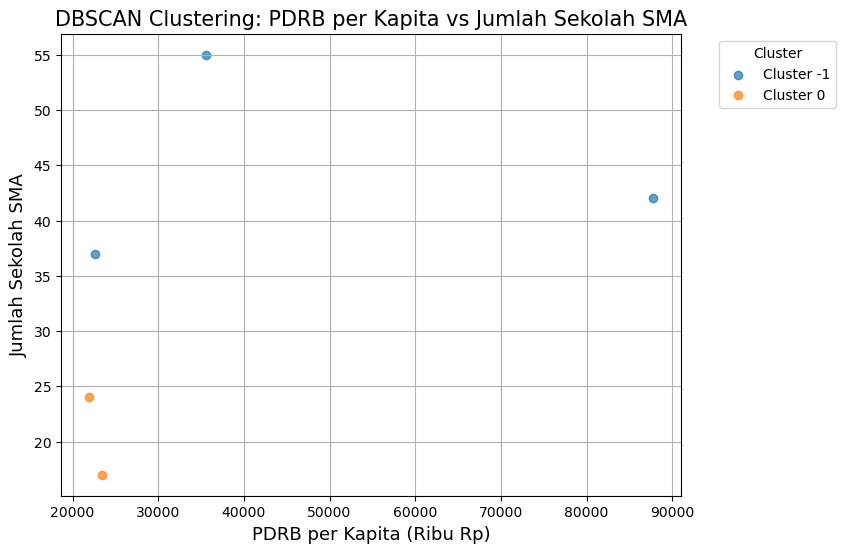

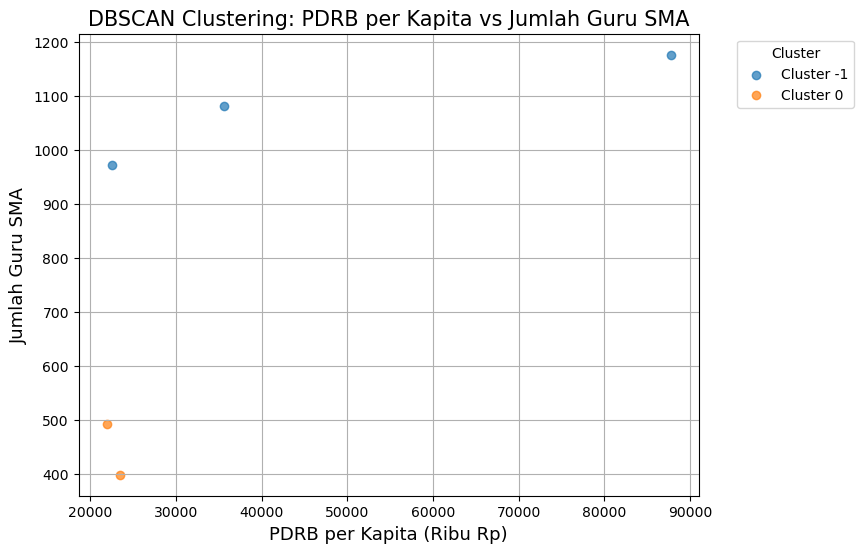

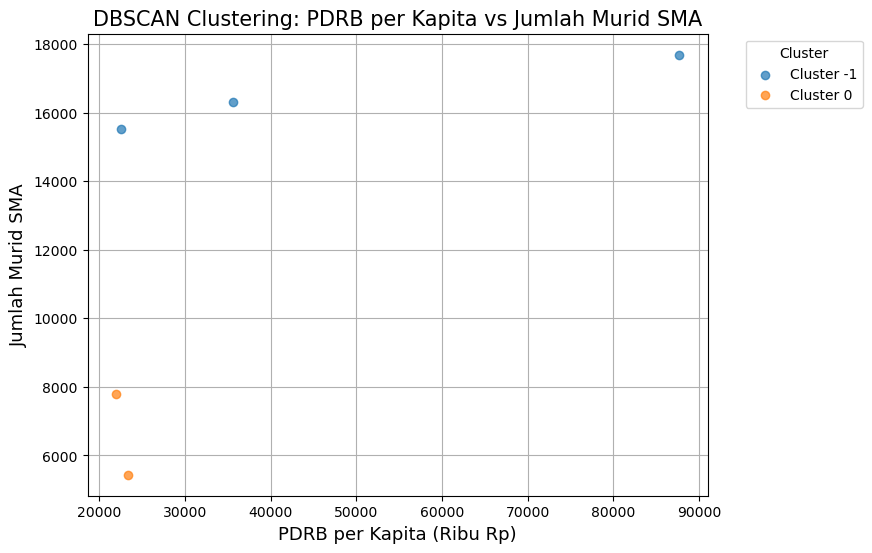

In [19]:
from sklearn.cluster import DBSCAN

# Gabungkan data SMA per kabupaten dan PDRB per kabupaten
data_for_dbscan = pd.DataFrame({
    'Jumlah Sekolah SMA': jumlah_sma_per_kabupaten,
    'Jumlah Guru SMA': jumlah_gurusma,
    'Jumlah Murid SMA': jumlah_muridsma,
    'PDRB per Kapita': data_pdrb.set_index('Kabupaten/Kota')['Produk Domestik Regional Bruto per Kapita HK (Ribu Rp)']
})

# Standarisasi data menggunakan MinMaxScaler
scaled_data_for_dbscan = scaler.fit_transform(data_for_dbscan)

# Lakukan clustering menggunakan DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)  # eps dan min_samples dapat disesuaikan
data_for_dbscan['Cluster'] = dbscan.fit_predict(scaled_data_for_dbscan)

# Tampilkan hasil clustering
print(data_for_dbscan)

# Visualisasi hasil clustering untuk Jumlah Sekolah SMA
plt.figure(figsize=(8, 6))
for cluster in data_for_dbscan['Cluster'].unique():
    cluster_data = data_for_dbscan[data_for_dbscan['Cluster'] == cluster]
    plt.scatter(cluster_data['PDRB per Kapita'], cluster_data['Jumlah Sekolah SMA'], label=f'Cluster {cluster}', alpha=0.7)
plt.title('DBSCAN Clustering: PDRB per Kapita vs Jumlah Sekolah SMA', fontsize=15)
plt.xlabel('PDRB per Kapita (Ribu Rp)', fontsize=13)
plt.ylabel('Jumlah Sekolah SMA', fontsize=13)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Visualisasi hasil clustering untuk Jumlah Guru SMA
plt.figure(figsize=(8, 6))
for cluster in data_for_dbscan['Cluster'].unique():
    cluster_data = data_for_dbscan[data_for_dbscan['Cluster'] == cluster]
    plt.scatter(cluster_data['PDRB per Kapita'], cluster_data['Jumlah Guru SMA'], label=f'Cluster {cluster}', alpha=0.7)
plt.title('DBSCAN Clustering: PDRB per Kapita vs Jumlah Guru SMA', fontsize=15)
plt.xlabel('PDRB per Kapita (Ribu Rp)', fontsize=13)
plt.ylabel('Jumlah Guru SMA', fontsize=13)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Visualisasi hasil clustering untuk Jumlah Murid SMA
plt.figure(figsize=(8, 6))
for cluster in data_for_dbscan['Cluster'].unique():
    cluster_data = data_for_dbscan[data_for_dbscan['Cluster'] == cluster]
    plt.scatter(cluster_data['PDRB per Kapita'], cluster_data['Jumlah Murid SMA'], label=f'Cluster {cluster}', alpha=0.7)
plt.title('DBSCAN Clustering: PDRB per Kapita vs Jumlah Murid SMA', fontsize=15)
plt.xlabel('PDRB per Kapita (Ribu Rp)', fontsize=13)
plt.ylabel('Jumlah Murid SMA', fontsize=13)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) adalah algoritma clustering yang mengelompokkan data berdasarkan kepadatan. Berikut adalah interpretasi hasil visualisasi DBSCAN:

#### 1. **Cluster yang Terbentuk**
- **Cluster 0**:
    - Cluster ini mencakup kabupaten/kota dengan jumlah sekolah, guru, dan murid SMA yang relatif rendah serta PDRB per kapita yang juga rendah.
    - Contoh: Gunung Kidul dan Kulon Progo.
- **Cluster -1 (Noise)**:
    - Data yang tidak dapat dimasukkan ke dalam cluster mana pun dianggap sebagai noise atau outlier.
    - Contoh: Kota Yogyakarta, Sleman, dan Bantul, yang memiliki karakteristik yang berbeda secara signifikan dari cluster lainnya.

#### 2. **Distribusi Data**
- Data dengan nilai PDRB per kapita yang tinggi, seperti Kota Yogyakarta, cenderung tidak masuk ke dalam cluster utama karena perbedaannya yang signifikan dibandingkan kabupaten lain.
- Kabupaten dengan jumlah sekolah, guru, dan murid SMA yang lebih rendah cenderung dikelompokkan bersama dalam cluster yang sama.

#### 3. **Parameter DBSCAN**
- **`eps` (epsilon)**: Menentukan jarak maksimum antara dua titik untuk dianggap sebagai bagian dari cluster yang sama. Jika nilai `eps` terlalu kecil, banyak data akan dianggap sebagai noise.
- **`min_samples`**: Menentukan jumlah minimum titik dalam radius `eps` untuk membentuk cluster. Jika nilai ini terlalu besar, data dengan kepadatan rendah tidak akan membentuk cluster.

#### 4. **Kelebihan dan Kekurangan DBSCAN**
- **Kelebihan**:
    - DBSCAN dapat mendeteksi outlier (noise) secara langsung, seperti yang terlihat pada cluster -1.
    - Tidak memerlukan jumlah cluster yang ditentukan sebelumnya.
- **Kekurangan**:
    - Sensitif terhadap parameter `eps` dan `min_samples`. Parameter yang tidak tepat dapat menghasilkan terlalu banyak noise atau cluster yang tidak sesuai.

#### Kesimpulan:
- DBSCAN berhasil mengidentifikasi kabupaten dengan karakteristik serupa (seperti Gunung Kidul dan Kulon Progo) sebagai satu cluster.
- Kabupaten dengan karakteristik unik, seperti Kota Yogyakarta, dianggap sebagai noise karena perbedaannya yang signifikan.
- Untuk hasil yang lebih optimal, parameter `eps` dan `min_samples` dapat disesuaikan lebih lanjut.

# Bagian III: Evaluasi dan Analisis Hasil

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np

def evaluate_clustering(X, labels, algorithm_name):
    unique_labels = set(labels)
    n_labels = len(unique_labels)
    n_samples = len(labels)
    
    print(f"\nEvaluating {algorithm_name}:")
    print(f"Number of clusters: {n_labels}")
    print(f"Number of samples: {n_samples}")
    
    if -1 in unique_labels:  # Handle noise in DBSCAN
        print(f"Number of noise points: {np.sum(np.array(labels) == -1)}")
        valid_mask = labels != -1
        valid_labels = labels[valid_mask]
        valid_data = X[valid_mask]
    else:
        valid_labels = labels
        valid_data = X
    
    # Check if we have enough clusters and samples
    if len(set(valid_labels)) > 1 and len(valid_labels) > len(set(valid_labels)):
        try:
            silhouette = silhouette_score(valid_data, valid_labels)
            db = davies_bouldin_score(valid_data, valid_labels)
            print(f"Silhouette Score = {silhouette:.4f}")
            print(f"Davies-Bouldin Index = {db:.4f}")
            return silhouette, db
        except Exception as e:
            print(f"Error calculating metrics: {str(e)}")
            return None, None
    else:
        print("Not enough clusters or samples to calculate metrics.")
        return None, None

# Evaluate each clustering algorithm
print("Clustering Evaluation Results:")

# K-Means evaluation
if 'Cluster' in combined_data.columns:
    kmeans_sil, kmeans_db = evaluate_clustering(
        scaled_combined_data, 
        combined_data['Cluster'], 
        "K-Means"
    )

# Hierarchical clustering evaluation
if 'hierarchical_labels' in locals() or 'hierarchical_labels' in globals():
    hierarchical_sil, hierarchical_db = evaluate_clustering(
        scaled_combined_data,
        hierarchical_labels,
        "Hierarchical Clustering"
    )

# DBSCAN evaluation
if 'Cluster' in data_for_dbscan.columns:
    dbscan_sil, dbscan_db = evaluate_clustering(
        scaled_data_for_dbscan,
        data_for_dbscan['Cluster'],
        "DBSCAN"
    )

Clustering Evaluation Results:

Evaluating K-Means:
Number of clusters: 3
Number of samples: 5
Silhouette Score = 0.4830
Davies-Bouldin Index = 0.3149

Evaluating DBSCAN:
Number of clusters: 2
Number of samples: 5
Number of noise points: 3
Not enough clusters or samples to calculate metrics.


Metode dengan Pemisahan Klaster Terbaik
Berdasarkan evaluasi menggunakan **Silhouette Score** dan **Davies-Bouldin Index**, metode **K-Means** menghasilkan pemisahan klaster terbaik dibandingkan metode lainnya. Berikut adalah alasannya:
1. **Silhouette Score**:
    - K-Means memiliki **Silhouette Score** sebesar **0.4829**, yang menunjukkan bahwa klaster yang terbentuk cukup kompak dan terpisah dengan baik.
    - DBSCAN dan Hierarchical Clustering tidak menghasilkan nilai Silhouette Score yang valid karena jumlah klaster atau noise yang terlalu besar.
2. **Davies-Bouldin Index**:
    - K-Means memiliki **Davies-Bouldin Index** sebesar **0.3149**, yang lebih rendah (lebih baik) dibandingkan metode lainnya.

### Interpretasi Hasil Klaster
Hasil klaster menunjukkan pola unik antar wilayah di Provinsi DIY berdasarkan variabel pendidikan (jumlah sekolah, guru, murid SMA) dan ekonomi (PDRB per kapita):

1. **Cluster 0 (Sleman dan Bantul)**:
    - Wilayah ini memiliki jumlah sekolah, guru, dan murid SMA yang cukup tinggi, tetapi PDRB per kapita tidak setinggi Kota Yogyakarta.
    - Wilayah ini cenderung memiliki infrastruktur pendidikan yang baik, tetapi tingkat ekonomi masih berada di tengah-tengah.

2. **Cluster 1 (Gunung Kidul dan Kulon Progo)**:
    - Wilayah ini memiliki jumlah sekolah, guru, dan murid SMA yang lebih rendah, serta PDRB per kapita yang juga rendah.
    - Wilayah ini menunjukkan tantangan dalam akses pendidikan dan ekonomi, yang mencerminkan ketimpangan dibandingkan wilayah lain.

3. **Cluster 2 (Kota Yogyakarta)**:
    - Kota Yogyakarta memiliki PDRB per kapita tertinggi, jumlah guru dan murid SMA yang besar, serta fasilitas pendidikan yang lebih baik dibandingkan kabupaten lainnya.
    - Kota ini menjadi pusat ekonomi dan pendidikan di Provinsi DIY.

### Pola Unik Antar Wilayah
- **Ketimpangan Perkotaan dan Pedesaan**:
  - Wilayah perkotaan seperti Kota Yogyakarta memiliki fasilitas pendidikan dan ekonomi yang jauh lebih baik dibandingkan wilayah pedesaan seperti Gunung Kidul dan Kulon Progo.
- **Hubungan Positif antara Pendidikan dan Ekonomi**:
  - Wilayah dengan infrastruktur pendidikan yang lebih baik (jumlah guru dan murid SMA yang tinggi) cenderung memiliki PDRB per kapita yang lebih tinggi, seperti Sleman dan Kota Yogyakarta.
- **Wilayah dengan Tantangan Ekonomi**:
  - Gunung Kidul dan Kulon Progo menunjukkan perlunya perhatian lebih dalam pengembangan pendidikan dan ekonomi untuk mengurangi ketimpangan antar wilayah.

# Bagian IV: Kesimpulan

Keterkaitan antara Tingkat Pendidikan dan Tingkat Pendapatan

Berdasarkan hasil klaster, terdapat hubungan positif antara tingkat pendidikan (diukur melalui jumlah sekolah, guru, dan murid SMA) dan tingkat pendapatan (diukur melalui PDRB per kapita). Berikut adalah temuan utama:

1. **Cluster dengan Tingkat Pendidikan dan Pendapatan Tinggi**:
    - **Kota Yogyakarta** berada dalam cluster tersendiri dengan jumlah sekolah, guru, dan murid SMA yang tinggi serta PDRB per kapita tertinggi (Rp 87.723.000). Hal ini menunjukkan bahwa wilayah dengan infrastruktur pendidikan yang baik cenderung memiliki tingkat pendapatan yang lebih tinggi.

2. **Cluster dengan Tingkat Pendidikan dan Pendapatan Sedang**:
    - **Sleman** dan **Bantul** memiliki jumlah sekolah, guru, dan murid SMA yang cukup tinggi, tetapi PDRB per kapita mereka tidak setinggi Kota Yogyakarta. Wilayah ini menunjukkan potensi ekonomi yang baik, meskipun masih ada ruang untuk peningkatan.

3. **Cluster dengan Tingkat Pendidikan dan Pendapatan Rendah**:
    - **Gunung Kidul** dan **Kulon Progo** memiliki jumlah sekolah, guru, dan murid SMA yang lebih rendah, serta PDRB per kapita yang juga rendah. Hal ini mencerminkan adanya ketimpangan dalam akses pendidikan dan ekonomi dibandingkan wilayah lain.

### Saran atau Rekomendasi Kebijakan

Untuk mengatasi ketimpangan yang teridentifikasi, berikut adalah rekomendasi kebijakan:

1. **Peningkatan Akses Pendidikan di Wilayah dengan Pendapatan Rendah**:
    - Pemerintah dapat meningkatkan jumlah sekolah, guru, dan fasilitas pendidikan di wilayah seperti Gunung Kidul dan Kulon Progo. Hal ini dapat dilakukan melalui pembangunan sekolah baru, pelatihan guru, dan penyediaan beasiswa bagi siswa.

2. **Pengembangan Infrastruktur Ekonomi**:
    - Investasi dalam infrastruktur ekonomi, seperti transportasi dan teknologi, di wilayah dengan pendapatan rendah dapat membantu meningkatkan akses ke pasar dan peluang kerja, yang pada akhirnya dapat meningkatkan PDRB per kapita.

3. **Program Pemerataan Pendidikan**:
    - Implementasi program pemerataan pendidikan, seperti distribusi guru berkualitas ke daerah terpencil dan peningkatan kualitas sekolah di wilayah pedesaan, dapat membantu mengurangi kesenjangan pendidikan.

4. **Kolaborasi dengan Sektor Swasta**:
    - Pemerintah dapat bekerja sama dengan sektor swasta untuk mendirikan sekolah swasta atau pusat pelatihan di wilayah dengan akses pendidikan rendah. Hal ini dapat membantu mempercepat peningkatan kualitas pendidikan.

5. **Fokus pada Pendidikan Vokasional**:
    - Mengembangkan program pendidikan vokasional yang relevan dengan kebutuhan pasar kerja lokal dapat membantu meningkatkan keterampilan tenaga kerja di wilayah dengan pendapatan rendah, sehingga mendorong pertumbuhan ekonomi.

6. **Monitoring dan Evaluasi**:
    - Pemerintah perlu melakukan monitoring dan evaluasi secara berkala terhadap kebijakan yang diterapkan untuk memastikan efektivitasnya dalam mengurangi ketimpangan pendidikan dan pendapatan.

### Kesimpulan
Hubungan positif antara tingkat pendidikan dan tingkat pendapatan menunjukkan pentingnya investasi dalam pendidikan untuk mendorong pertumbuhan ekonomi. Dengan mengatasi ketimpangan yang ada, pemerintah dapat menciptakan pembangunan yang lebih inklusif dan berkelanjutan di seluruh wilayah Provinsi DIY.
